In [2]:
import gym
import torch

from src.Learner.AWAC import AWAC
from src.Learner.DQN import DQN
from src.Learner.Random import DiscreteRandomAgent
from src.nn.MLP import MLP
from src.utils.memory import ReplayMemory
from src.utils.train_utils import prepare_training_inputs

import matplotlib.pyplot as plt

C:\Users\Go\miniconda3\envs\pro1\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)


fitting [1000] / [5000]
fitting [2000] / [5000]
fitting [3000] / [5000]
fitting [4000] / [5000]


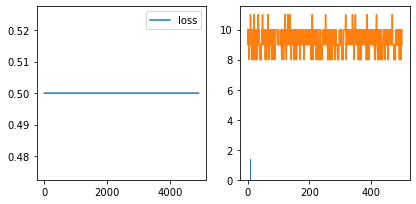

In [4]:
# qnet = MLP(4, 2, 
#            num_neurons=[128,128], 
#            out_act='ReLU')
# state =4차원 action 2차원
env = gym.make('CartPole-v1')
memory_size = 500000
memory_online_dqn = ReplayMemory(memory_size)
qnet = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')
qnet_target = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')

epsilon = 0.8
gamma = 0.9
lr = 0.001
action_dim = 1

# q_net target을 어찌설정할지 모르겠음
online_new_dqn_agent = DQN(state_dim=qnet,action_dim=action_dim,qnet=qnet,qnet_target=qnet_target,lr=lr,epsilon=epsilon,gamma=gamma,)

fit_device = 'cuda' if torch.cuda.is_available() else 'cpu'
online_new_dqn_agent.to(fit_device)
# false로 설정하여 메모리에 계속 추가됨
refresh_memory = False
if refresh_memory:
    memory_online_dqn.reset()

# 메모리에 online data 수집하는 과정
online_budget = 5000
batch_size = 1000
online_dqn_cum_rs = []
dqn_online_losses = []
for n_epi in range(online_budget):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)
        
        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)
        
        s = ns
        cum_r += 1
        if done:
            online_dqn_cum_rs.append(cum_r)
            break
    
    # 데이터를 수집한 후 모델 업데이트
    if len(memory_online_dqn) >= batch_size:
        if n_epi%batch_size ==0:
            print("fitting [{}] / [{}]".format(n_epi, online_budget))
        #전체데이터를 사용하는 것이 아니라 샘플링을 통해 사용(offline data도 포함되어 있는 상태)
        sampled_exps = memory_online_dqn.sample(batch_size)
        _s, _a, _r, _ns, _done = prepare_training_inputs(sampled_exps, device=fit_device)
        online_new_dqn_agent.to(fit_device)
        loss = online_new_dqn_agent.update(_s,_a,_r,_ns,_done)
        # ep 점점 감소하는 방식
        online_new_dqn_agent.epsilon = online_new_dqn_agent.epsilon*(online_budget-n_epi)/online_budget
        dqn_online_losses.append(loss.detach())
        
        online_new_dqn_agent.to('cpu')
fig, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].plot(dqn_online_losses, label='loss')
axes[0].legend()
fig.tight_layout()
only_online_dqn_cum_rs = []
test = 500
for n_epi in range(test):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)

        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)

        s = ns
        cum_r += 1
        if done:
            only_online_dqn_cum_rs.append(cum_r)
            break
plt.hist(only_online_dqn_cum_rs, density=True, label='only_online_dqn')
plt.plot(range(len(only_online_dqn_cum_rs)), only_online_dqn_cum_rs)

fitting [1000] / [5000]
fitting [2000] / [5000]
fitting [3000] / [5000]
fitting [4000] / [5000]


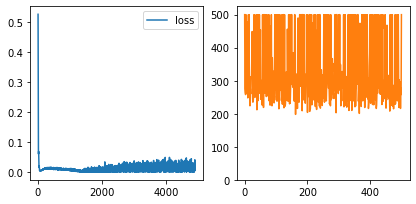

In [5]:
# qnet = MLP(4, 2, 
#            num_neurons=[128,128], 
#            out_act='ReLU')
# state =4차원 action 2차원
env = gym.make('CartPole-v1')
memory_size = 500000
memory_online_dqn = ReplayMemory(memory_size)
qnet = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')
qnet_target = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')

epsilon = 0.8
gamma = 0.9
lr = 0.001
action_dim = 1

# q_net target을 어찌설정할지 모르겠음
online_new_dqn_agent = DQN(state_dim=qnet,action_dim=action_dim,qnet=qnet,qnet_target=qnet_target,lr=lr,epsilon=epsilon,gamma=gamma,)

fit_device = 'cuda' if torch.cuda.is_available() else 'cpu'
online_new_dqn_agent.to(fit_device)
# false로 설정하여 메모리에 계속 추가됨
refresh_memory = False
if refresh_memory:
    memory_online_dqn.reset()

# 메모리에 online data 수집하는 과정
online_budget = 5000
batch_size = 1000
online_dqn_cum_rs = []
dqn_online_losses = []
for n_epi in range(online_budget):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)
        
        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)
        
        s = ns
        cum_r += 1
        if done:
            online_dqn_cum_rs.append(cum_r)
            break
    
    # 데이터를 수집한 후 모델 업데이트
    if len(memory_online_dqn) >= batch_size:
        if n_epi%batch_size ==0:
            print("fitting [{}] / [{}]".format(n_epi, online_budget))
        #전체데이터를 사용하는 것이 아니라 샘플링을 통해 사용(offline data도 포함되어 있는 상태)
        sampled_exps = memory_online_dqn.sample(batch_size)
        _s, _a, _r, _ns, _done = prepare_training_inputs(sampled_exps, device=fit_device)
        online_new_dqn_agent.to(fit_device)
        loss = online_new_dqn_agent.update(_s,_a,_r,_ns,_done)
        # ep 점점 감소하는 방식
        online_new_dqn_agent.epsilon = online_new_dqn_agent.epsilon*(online_budget-n_epi)/online_budget
        dqn_online_losses.append(loss.detach())
        
        online_new_dqn_agent.to('cpu')
fig, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].plot(dqn_online_losses, label='loss')
axes[0].legend()
fig.tight_layout()
only_online_dqn_cum_rs = []
test = 500
for n_epi in range(test):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)

        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)

        s = ns
        cum_r += 1
        if done:
            only_online_dqn_cum_rs.append(cum_r)
            break
plt.hist(only_online_dqn_cum_rs, density=True, label='only_online_dqn')
plt.plot(range(len(only_online_dqn_cum_rs)), only_online_dqn_cum_rs)

fitting [1000] / [5000]
fitting [2000] / [5000]
fitting [3000] / [5000]
fitting [4000] / [5000]


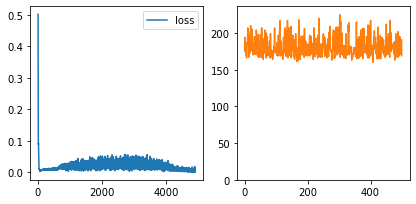

In [6]:
# qnet = MLP(4, 2, 
#            num_neurons=[128,128], 
#            out_act='ReLU')
# state =4차원 action 2차원
env = gym.make('CartPole-v1')
memory_size = 500000
memory_online_dqn = ReplayMemory(memory_size)
qnet = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')
qnet_target = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')

epsilon = 0.8
gamma = 0.9
lr = 0.001
action_dim = 1

# q_net target을 어찌설정할지 모르겠음
online_new_dqn_agent = DQN(state_dim=qnet,action_dim=action_dim,qnet=qnet,qnet_target=qnet_target,lr=lr,epsilon=epsilon,gamma=gamma,)

fit_device = 'cuda' if torch.cuda.is_available() else 'cpu'
online_new_dqn_agent.to(fit_device)
# false로 설정하여 메모리에 계속 추가됨
refresh_memory = False
if refresh_memory:
    memory_online_dqn.reset()

# 메모리에 online data 수집하는 과정
online_budget = 5000
batch_size = 1000
online_dqn_cum_rs = []
dqn_online_losses = []
for n_epi in range(online_budget):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)
        
        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)
        
        s = ns
        cum_r += 1
        if done:
            online_dqn_cum_rs.append(cum_r)
            break
    
    # 데이터를 수집한 후 모델 업데이트
    if len(memory_online_dqn) >= batch_size:
        if n_epi%batch_size ==0:
            print("fitting [{}] / [{}]".format(n_epi, online_budget))
        #전체데이터를 사용하는 것이 아니라 샘플링을 통해 사용(offline data도 포함되어 있는 상태)
        sampled_exps = memory_online_dqn.sample(batch_size)
        _s, _a, _r, _ns, _done = prepare_training_inputs(sampled_exps, device=fit_device)
        online_new_dqn_agent.to(fit_device)
        loss = online_new_dqn_agent.update(_s,_a,_r,_ns,_done)
        # ep 점점 감소하는 방식
        online_new_dqn_agent.epsilon = online_new_dqn_agent.epsilon*(online_budget-n_epi)/online_budget
        dqn_online_losses.append(loss.detach())
        
        online_new_dqn_agent.to('cpu')
fig, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].plot(dqn_online_losses, label='loss')
axes[0].legend()
fig.tight_layout()
only_online_dqn_cum_rs = []
test = 500
for n_epi in range(test):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)

        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)

        s = ns
        cum_r += 1
        if done:
            only_online_dqn_cum_rs.append(cum_r)
            break
plt.hist(only_online_dqn_cum_rs, density=True, label='only_online_dqn')
plt.plot(range(len(only_online_dqn_cum_rs)), only_online_dqn_cum_rs)

fitting [1000] / [5000]
fitting [2000] / [5000]
fitting [3000] / [5000]
fitting [4000] / [5000]


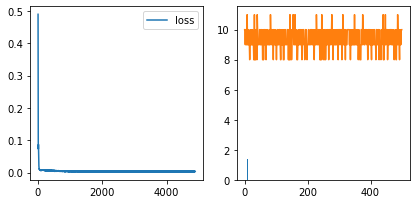

In [7]:
# qnet = MLP(4, 2, 
#            num_neurons=[128,128], 
#            out_act='ReLU')
# state =4차원 action 2차원
env = gym.make('CartPole-v1')
memory_size = 500000
memory_online_dqn = ReplayMemory(memory_size)
qnet = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')
qnet_target = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')

epsilon = 0.8
gamma = 0.9
lr = 0.001
action_dim = 1

# q_net target을 어찌설정할지 모르겠음
online_new_dqn_agent = DQN(state_dim=qnet,action_dim=action_dim,qnet=qnet,qnet_target=qnet_target,lr=lr,epsilon=epsilon,gamma=gamma,)

fit_device = 'cuda' if torch.cuda.is_available() else 'cpu'
online_new_dqn_agent.to(fit_device)
# false로 설정하여 메모리에 계속 추가됨
refresh_memory = False
if refresh_memory:
    memory_online_dqn.reset()

# 메모리에 online data 수집하는 과정
online_budget = 5000
batch_size = 1000
online_dqn_cum_rs = []
dqn_online_losses = []
for n_epi in range(online_budget):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)
        
        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)
        
        s = ns
        cum_r += 1
        if done:
            online_dqn_cum_rs.append(cum_r)
            break
    
    # 데이터를 수집한 후 모델 업데이트
    if len(memory_online_dqn) >= batch_size:
        if n_epi%batch_size ==0:
            print("fitting [{}] / [{}]".format(n_epi, online_budget))
        #전체데이터를 사용하는 것이 아니라 샘플링을 통해 사용(offline data도 포함되어 있는 상태)
        sampled_exps = memory_online_dqn.sample(batch_size)
        _s, _a, _r, _ns, _done = prepare_training_inputs(sampled_exps, device=fit_device)
        online_new_dqn_agent.to(fit_device)
        loss = online_new_dqn_agent.update(_s,_a,_r,_ns,_done)
        # ep 점점 감소하는 방식
        online_new_dqn_agent.epsilon = online_new_dqn_agent.epsilon*(online_budget-n_epi)/online_budget
        dqn_online_losses.append(loss.detach())
        
        online_new_dqn_agent.to('cpu')
fig, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].plot(dqn_online_losses, label='loss')
axes[0].legend()
fig.tight_layout()
only_online_dqn_cum_rs = []
test = 500
for n_epi in range(test):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)

        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)

        s = ns
        cum_r += 1
        if done:
            only_online_dqn_cum_rs.append(cum_r)
            break
plt.hist(only_online_dqn_cum_rs, density=True, label='only_online_dqn')
plt.plot(range(len(only_online_dqn_cum_rs)), only_online_dqn_cum_rs)

fitting [1000] / [5000]
fitting [2000] / [5000]
fitting [3000] / [5000]
fitting [4000] / [5000]


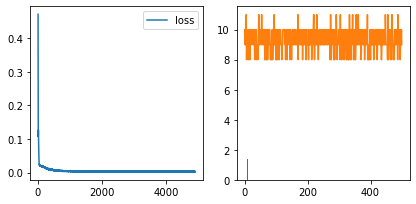

In [8]:
# qnet = MLP(4, 2, 
#            num_neurons=[128,128], 
#            out_act='ReLU')
# state =4차원 action 2차원
env = gym.make('CartPole-v1')
memory_size = 500000
memory_online_dqn = ReplayMemory(memory_size)
qnet = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')
qnet_target = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')

epsilon = 0.8
gamma = 0.9
lr = 0.001
action_dim = 1

# q_net target을 어찌설정할지 모르겠음
online_new_dqn_agent = DQN(state_dim=qnet,action_dim=action_dim,qnet=qnet,qnet_target=qnet_target,lr=lr,epsilon=epsilon,gamma=gamma,)

fit_device = 'cuda' if torch.cuda.is_available() else 'cpu'
online_new_dqn_agent.to(fit_device)
# false로 설정하여 메모리에 계속 추가됨
refresh_memory = False
if refresh_memory:
    memory_online_dqn.reset()

# 메모리에 online data 수집하는 과정
online_budget = 5000
batch_size = 1000
online_dqn_cum_rs = []
dqn_online_losses = []
for n_epi in range(online_budget):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)
        
        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)
        
        s = ns
        cum_r += 1
        if done:
            online_dqn_cum_rs.append(cum_r)
            break
    
    # 데이터를 수집한 후 모델 업데이트
    if len(memory_online_dqn) >= batch_size:
        if n_epi%batch_size ==0:
            print("fitting [{}] / [{}]".format(n_epi, online_budget))
        #전체데이터를 사용하는 것이 아니라 샘플링을 통해 사용(offline data도 포함되어 있는 상태)
        sampled_exps = memory_online_dqn.sample(batch_size)
        _s, _a, _r, _ns, _done = prepare_training_inputs(sampled_exps, device=fit_device)
        online_new_dqn_agent.to(fit_device)
        loss = online_new_dqn_agent.update(_s,_a,_r,_ns,_done)
        # ep 점점 감소하는 방식
        online_new_dqn_agent.epsilon = online_new_dqn_agent.epsilon*(online_budget-n_epi)/online_budget
        dqn_online_losses.append(loss.detach())
        
        online_new_dqn_agent.to('cpu')
fig, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].plot(dqn_online_losses, label='loss')
axes[0].legend()
fig.tight_layout()
only_online_dqn_cum_rs = []
test = 500
for n_epi in range(test):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)

        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)

        s = ns
        cum_r += 1
        if done:
            only_online_dqn_cum_rs.append(cum_r)
            break
plt.hist(only_online_dqn_cum_rs, density=True, label='only_online_dqn')
plt.plot(range(len(only_online_dqn_cum_rs)), only_online_dqn_cum_rs)

fitting [1000] / [5000]
fitting [2000] / [5000]
fitting [3000] / [5000]
fitting [4000] / [5000]


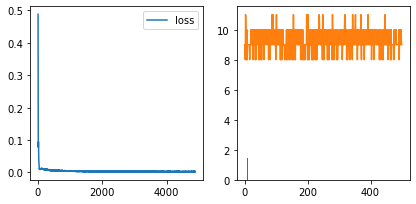

In [9]:
# qnet = MLP(4, 2, 
#            num_neurons=[128,128], 
#            out_act='ReLU')
# state =4차원 action 2차원
env = gym.make('CartPole-v1')
memory_size = 500000
memory_online_dqn = ReplayMemory(memory_size)
qnet = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')
qnet_target = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')

epsilon = 0.8
gamma = 0.9
lr = 0.001
action_dim = 1

# q_net target을 어찌설정할지 모르겠음
online_new_dqn_agent = DQN(state_dim=qnet,action_dim=action_dim,qnet=qnet,qnet_target=qnet_target,lr=lr,epsilon=epsilon,gamma=gamma,)

fit_device = 'cuda' if torch.cuda.is_available() else 'cpu'
online_new_dqn_agent.to(fit_device)
# false로 설정하여 메모리에 계속 추가됨
refresh_memory = False
if refresh_memory:
    memory_online_dqn.reset()

# 메모리에 online data 수집하는 과정
online_budget = 5000
batch_size = 1000
online_dqn_cum_rs = []
dqn_online_losses = []
for n_epi in range(online_budget):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)
        
        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)
        
        s = ns
        cum_r += 1
        if done:
            online_dqn_cum_rs.append(cum_r)
            break
    
    # 데이터를 수집한 후 모델 업데이트
    if len(memory_online_dqn) >= batch_size:
        if n_epi%batch_size ==0:
            print("fitting [{}] / [{}]".format(n_epi, online_budget))
        #전체데이터를 사용하는 것이 아니라 샘플링을 통해 사용(offline data도 포함되어 있는 상태)
        sampled_exps = memory_online_dqn.sample(batch_size)
        _s, _a, _r, _ns, _done = prepare_training_inputs(sampled_exps, device=fit_device)
        online_new_dqn_agent.to(fit_device)
        loss = online_new_dqn_agent.update(_s,_a,_r,_ns,_done)
        # ep 점점 감소하는 방식
        online_new_dqn_agent.epsilon = online_new_dqn_agent.epsilon*(online_budget-n_epi)/online_budget
        dqn_online_losses.append(loss.detach())
        
        online_new_dqn_agent.to('cpu')
fig, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].plot(dqn_online_losses, label='loss')
axes[0].legend()
fig.tight_layout()
only_online_dqn_cum_rs = []
test = 500
for n_epi in range(test):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)

        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)

        s = ns
        cum_r += 1
        if done:
            only_online_dqn_cum_rs.append(cum_r)
            break
plt.hist(only_online_dqn_cum_rs, density=True, label='only_online_dqn')
plt.plot(range(len(only_online_dqn_cum_rs)), only_online_dqn_cum_rs)

fitting [1000] / [5000]
fitting [2000] / [5000]
fitting [3000] / [5000]
fitting [4000] / [5000]


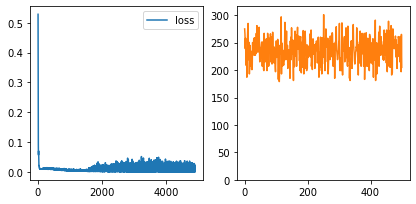

In [10]:
# qnet = MLP(4, 2, 
#            num_neurons=[128,128], 
#            out_act='ReLU')
# state =4차원 action 2차원
env = gym.make('CartPole-v1')
memory_size = 500000
memory_online_dqn = ReplayMemory(memory_size)
qnet = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')
qnet_target = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')

epsilon = 0.8
gamma = 0.9
lr = 0.001
action_dim = 1

# q_net target을 어찌설정할지 모르겠음
online_new_dqn_agent = DQN(state_dim=qnet,action_dim=action_dim,qnet=qnet,qnet_target=qnet_target,lr=lr,epsilon=epsilon,gamma=gamma,)

fit_device = 'cuda' if torch.cuda.is_available() else 'cpu'
online_new_dqn_agent.to(fit_device)
# false로 설정하여 메모리에 계속 추가됨
refresh_memory = False
if refresh_memory:
    memory_online_dqn.reset()

# 메모리에 online data 수집하는 과정
online_budget = 5000
batch_size = 1000
online_dqn_cum_rs = []
dqn_online_losses = []
for n_epi in range(online_budget):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)
        
        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)
        
        s = ns
        cum_r += 1
        if done:
            online_dqn_cum_rs.append(cum_r)
            break
    
    # 데이터를 수집한 후 모델 업데이트
    if len(memory_online_dqn) >= batch_size:
        if n_epi%batch_size ==0:
            print("fitting [{}] / [{}]".format(n_epi, online_budget))
        #전체데이터를 사용하는 것이 아니라 샘플링을 통해 사용(offline data도 포함되어 있는 상태)
        sampled_exps = memory_online_dqn.sample(batch_size)
        _s, _a, _r, _ns, _done = prepare_training_inputs(sampled_exps, device=fit_device)
        online_new_dqn_agent.to(fit_device)
        loss = online_new_dqn_agent.update(_s,_a,_r,_ns,_done)
        # ep 점점 감소하는 방식
        online_new_dqn_agent.epsilon = online_new_dqn_agent.epsilon*(online_budget-n_epi)/online_budget
        dqn_online_losses.append(loss.detach())
        
        online_new_dqn_agent.to('cpu')
fig, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].plot(dqn_online_losses, label='loss')
axes[0].legend()
fig.tight_layout()
only_online_dqn_cum_rs = []
test = 500
for n_epi in range(test):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)

        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)

        s = ns
        cum_r += 1
        if done:
            only_online_dqn_cum_rs.append(cum_r)
            break
plt.hist(only_online_dqn_cum_rs, density=True, label='only_online_dqn')
plt.plot(range(len(only_online_dqn_cum_rs)), only_online_dqn_cum_rs)

fitting [1000] / [5000]
fitting [2000] / [5000]
fitting [3000] / [5000]
fitting [4000] / [5000]


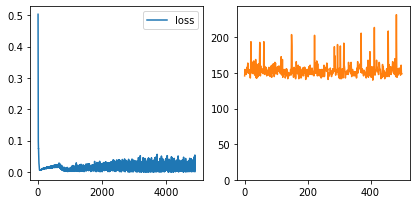

In [11]:
# qnet = MLP(4, 2, 
#            num_neurons=[128,128], 
#            out_act='ReLU')
# state =4차원 action 2차원
env = gym.make('CartPole-v1')
memory_size = 500000
memory_online_dqn = ReplayMemory(memory_size)
qnet = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')
qnet_target = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')

epsilon = 0.8
gamma = 0.9
lr = 0.001
action_dim = 1

# q_net target을 어찌설정할지 모르겠음
online_new_dqn_agent = DQN(state_dim=qnet,action_dim=action_dim,qnet=qnet,qnet_target=qnet_target,lr=lr,epsilon=epsilon,gamma=gamma,)

fit_device = 'cuda' if torch.cuda.is_available() else 'cpu'
online_new_dqn_agent.to(fit_device)
# false로 설정하여 메모리에 계속 추가됨
refresh_memory = False
if refresh_memory:
    memory_online_dqn.reset()

# 메모리에 online data 수집하는 과정
online_budget = 5000
batch_size = 1000
online_dqn_cum_rs = []
dqn_online_losses = []
for n_epi in range(online_budget):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)
        
        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)
        
        s = ns
        cum_r += 1
        if done:
            online_dqn_cum_rs.append(cum_r)
            break
    
    # 데이터를 수집한 후 모델 업데이트
    if len(memory_online_dqn) >= batch_size:
        if n_epi%batch_size ==0:
            print("fitting [{}] / [{}]".format(n_epi, online_budget))
        #전체데이터를 사용하는 것이 아니라 샘플링을 통해 사용(offline data도 포함되어 있는 상태)
        sampled_exps = memory_online_dqn.sample(batch_size)
        _s, _a, _r, _ns, _done = prepare_training_inputs(sampled_exps, device=fit_device)
        online_new_dqn_agent.to(fit_device)
        loss = online_new_dqn_agent.update(_s,_a,_r,_ns,_done)
        # ep 점점 감소하는 방식
        online_new_dqn_agent.epsilon = online_new_dqn_agent.epsilon*(online_budget-n_epi)/online_budget
        dqn_online_losses.append(loss.detach())
        
        online_new_dqn_agent.to('cpu')
fig, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].plot(dqn_online_losses, label='loss')
axes[0].legend()
fig.tight_layout()
only_online_dqn_cum_rs = []
test = 500
for n_epi in range(test):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)

        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)

        s = ns
        cum_r += 1
        if done:
            only_online_dqn_cum_rs.append(cum_r)
            break
plt.hist(only_online_dqn_cum_rs, density=True, label='only_online_dqn')
plt.plot(range(len(only_online_dqn_cum_rs)), only_online_dqn_cum_rs)

fitting [1000] / [5000]
fitting [2000] / [5000]
fitting [3000] / [5000]
fitting [4000] / [5000]


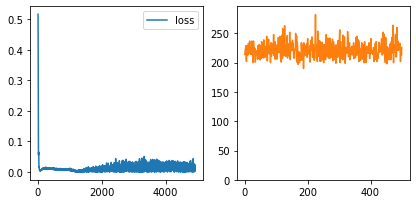

In [12]:
# qnet = MLP(4, 2, 
#            num_neurons=[128,128], 
#            out_act='ReLU')
# state =4차원 action 2차원
env = gym.make('CartPole-v1')
memory_size = 500000
memory_online_dqn = ReplayMemory(memory_size)
qnet = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')
qnet_target = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')

epsilon = 0.8
gamma = 0.9
lr = 0.001
action_dim = 1

# q_net target을 어찌설정할지 모르겠음
online_new_dqn_agent = DQN(state_dim=qnet,action_dim=action_dim,qnet=qnet,qnet_target=qnet_target,lr=lr,epsilon=epsilon,gamma=gamma,)

fit_device = 'cuda' if torch.cuda.is_available() else 'cpu'
online_new_dqn_agent.to(fit_device)
# false로 설정하여 메모리에 계속 추가됨
refresh_memory = False
if refresh_memory:
    memory_online_dqn.reset()

# 메모리에 online data 수집하는 과정
online_budget = 5000
batch_size = 1000
online_dqn_cum_rs = []
dqn_online_losses = []
for n_epi in range(online_budget):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)
        
        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)
        
        s = ns
        cum_r += 1
        if done:
            online_dqn_cum_rs.append(cum_r)
            break
    
    # 데이터를 수집한 후 모델 업데이트
    if len(memory_online_dqn) >= batch_size:
        if n_epi%batch_size ==0:
            print("fitting [{}] / [{}]".format(n_epi, online_budget))
        #전체데이터를 사용하는 것이 아니라 샘플링을 통해 사용(offline data도 포함되어 있는 상태)
        sampled_exps = memory_online_dqn.sample(batch_size)
        _s, _a, _r, _ns, _done = prepare_training_inputs(sampled_exps, device=fit_device)
        online_new_dqn_agent.to(fit_device)
        loss = online_new_dqn_agent.update(_s,_a,_r,_ns,_done)
        # ep 점점 감소하는 방식
        online_new_dqn_agent.epsilon = online_new_dqn_agent.epsilon*(online_budget-n_epi)/online_budget
        dqn_online_losses.append(loss.detach())
        
        online_new_dqn_agent.to('cpu')
fig, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].plot(dqn_online_losses, label='loss')
axes[0].legend()
fig.tight_layout()
only_online_dqn_cum_rs = []
test = 500
for n_epi in range(test):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)

        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)

        s = ns
        cum_r += 1
        if done:
            only_online_dqn_cum_rs.append(cum_r)
            break
plt.hist(only_online_dqn_cum_rs, density=True, label='only_online_dqn')
plt.plot(range(len(only_online_dqn_cum_rs)), only_online_dqn_cum_rs)

fitting [1000] / [5000]
fitting [2000] / [5000]
fitting [3000] / [5000]
fitting [4000] / [5000]


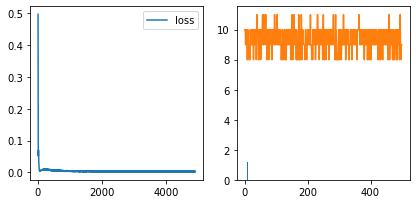

In [13]:
# qnet = MLP(4, 2, 
#            num_neurons=[128,128], 
#            out_act='ReLU')
# state =4차원 action 2차원
env = gym.make('CartPole-v1')
memory_size = 500000
memory_online_dqn = ReplayMemory(memory_size)
qnet = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')
qnet_target = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')

epsilon = 0.8
gamma = 0.9
lr = 0.001
action_dim = 1

# q_net target을 어찌설정할지 모르겠음
online_new_dqn_agent = DQN(state_dim=qnet,action_dim=action_dim,qnet=qnet,qnet_target=qnet_target,lr=lr,epsilon=epsilon,gamma=gamma,)

fit_device = 'cuda' if torch.cuda.is_available() else 'cpu'
online_new_dqn_agent.to(fit_device)
# false로 설정하여 메모리에 계속 추가됨
refresh_memory = False
if refresh_memory:
    memory_online_dqn.reset()

# 메모리에 online data 수집하는 과정
online_budget = 5000
batch_size = 1000
online_dqn_cum_rs = []
dqn_online_losses = []
for n_epi in range(online_budget):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)
        
        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)
        
        s = ns
        cum_r += 1
        if done:
            online_dqn_cum_rs.append(cum_r)
            break
    
    # 데이터를 수집한 후 모델 업데이트
    if len(memory_online_dqn) >= batch_size:
        if n_epi%batch_size ==0:
            print("fitting [{}] / [{}]".format(n_epi, online_budget))
        #전체데이터를 사용하는 것이 아니라 샘플링을 통해 사용(offline data도 포함되어 있는 상태)
        sampled_exps = memory_online_dqn.sample(batch_size)
        _s, _a, _r, _ns, _done = prepare_training_inputs(sampled_exps, device=fit_device)
        online_new_dqn_agent.to(fit_device)
        loss = online_new_dqn_agent.update(_s,_a,_r,_ns,_done)
        # ep 점점 감소하는 방식
        online_new_dqn_agent.epsilon = online_new_dqn_agent.epsilon*(online_budget-n_epi)/online_budget
        dqn_online_losses.append(loss.detach())
        
        online_new_dqn_agent.to('cpu')
fig, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].plot(dqn_online_losses, label='loss')
axes[0].legend()
fig.tight_layout()
only_online_dqn_cum_rs = []
test = 500
for n_epi in range(test):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)

        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)

        s = ns
        cum_r += 1
        if done:
            only_online_dqn_cum_rs.append(cum_r)
            break
plt.hist(only_online_dqn_cum_rs, density=True, label='only_online_dqn')
plt.plot(range(len(only_online_dqn_cum_rs)), only_online_dqn_cum_rs)

fitting [1000] / [5000]
fitting [2000] / [5000]
fitting [3000] / [5000]
fitting [4000] / [5000]


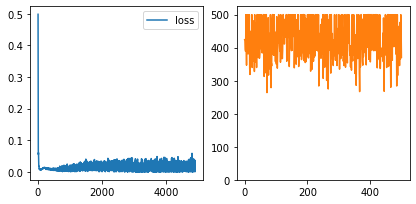

In [14]:
# qnet = MLP(4, 2, 
#            num_neurons=[128,128], 
#            out_act='ReLU')
# state =4차원 action 2차원
env = gym.make('CartPole-v1')
memory_size = 500000
memory_online_dqn = ReplayMemory(memory_size)
qnet = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')
qnet_target = MLP(4, 2, num_neurons=[128,128],out_act='ReLU')

epsilon = 0.8
gamma = 0.9
lr = 0.001
action_dim = 1

# q_net target을 어찌설정할지 모르겠음
online_new_dqn_agent = DQN(state_dim=qnet,action_dim=action_dim,qnet=qnet,qnet_target=qnet_target,lr=lr,epsilon=epsilon,gamma=gamma,)

fit_device = 'cuda' if torch.cuda.is_available() else 'cpu'
online_new_dqn_agent.to(fit_device)
# false로 설정하여 메모리에 계속 추가됨
refresh_memory = False
if refresh_memory:
    memory_online_dqn.reset()

# 메모리에 online data 수집하는 과정
online_budget = 5000
batch_size = 1000
online_dqn_cum_rs = []
dqn_online_losses = []
for n_epi in range(online_budget):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)
        
        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)
        
        s = ns
        cum_r += 1
        if done:
            online_dqn_cum_rs.append(cum_r)
            break
    
    # 데이터를 수집한 후 모델 업데이트
    if len(memory_online_dqn) >= batch_size:
        if n_epi%batch_size ==0:
            print("fitting [{}] / [{}]".format(n_epi, online_budget))
        #전체데이터를 사용하는 것이 아니라 샘플링을 통해 사용(offline data도 포함되어 있는 상태)
        sampled_exps = memory_online_dqn.sample(batch_size)
        _s, _a, _r, _ns, _done = prepare_training_inputs(sampled_exps, device=fit_device)
        online_new_dqn_agent.to(fit_device)
        loss = online_new_dqn_agent.update(_s,_a,_r,_ns,_done)
        # ep 점점 감소하는 방식
        online_new_dqn_agent.epsilon = online_new_dqn_agent.epsilon*(online_budget-n_epi)/online_budget
        dqn_online_losses.append(loss.detach())
        
        online_new_dqn_agent.to('cpu')
fig, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].plot(dqn_online_losses, label='loss')
axes[0].legend()
fig.tight_layout()
only_online_dqn_cum_rs = []
test = 500
for n_epi in range(test):
    s = env.reset()
    cum_r = 0

    while True:
        s = torch.tensor((s,), dtype=torch.float)
        a = online_new_dqn_agent.get_action(s)
        ns, r, done, info = env.step(a)

        experience = (s,
                      torch.tensor(a).view(1, 1),
                      torch.tensor(r).view(1, 1),
                      torch.tensor(ns).view(1, 4),
                      torch.tensor(done).view(1, 1))
        memory_online_dqn.push(experience)

        s = ns
        cum_r += 1
        if done:
            only_online_dqn_cum_rs.append(cum_r)
            break
plt.hist(only_online_dqn_cum_rs, density=True, label='only_online_dqn')
plt.plot(range(len(only_online_dqn_cum_rs)), only_online_dqn_cum_rs)